<a href="https://colab.research.google.com/github/jannchoi/kickboard/blob/main/yolov8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri May 24 07:35:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!cd /content/drive/MyDrive/yolov8_5

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UgF0JRHFkrAoP5dAFe2j")
project = rf.workspace("kick-board").project("pm-3jqlj")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pm-1 in yolov8:: 100%|██████████| 752/752 [00:00<00:00, 4462.59it/s]


In [ ]:
%cd /content/drive/MyDrive/yolov8_5/pm-1

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/drive/MyDrive/yolov8_5/pm-1/data.yaml epochs=100 imgsz=640

/content/drive/MyDrive/yolov8_5/pm-1
100% 22.8M/22.8M [00:00<00:00, 47.4MB/s]
New https://pypi.org/project/ultralytics/8.2.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/yolov8_5/pm-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

In [ ]:
!ls /content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/

args.yaml					    labels.jpg		 train_batch1711.jpg
BoxF1_curve.png					    MaskF1_curve.png	 train_batch1712.jpg
BoxP_curve.png					    MaskP_curve.png	 train_batch1.jpg
BoxPR_curve.png					    MaskPR_curve.png	 train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1716536491.5e51f6358a59.2632.0  train_batch0.jpg	 val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1710.jpg  weights


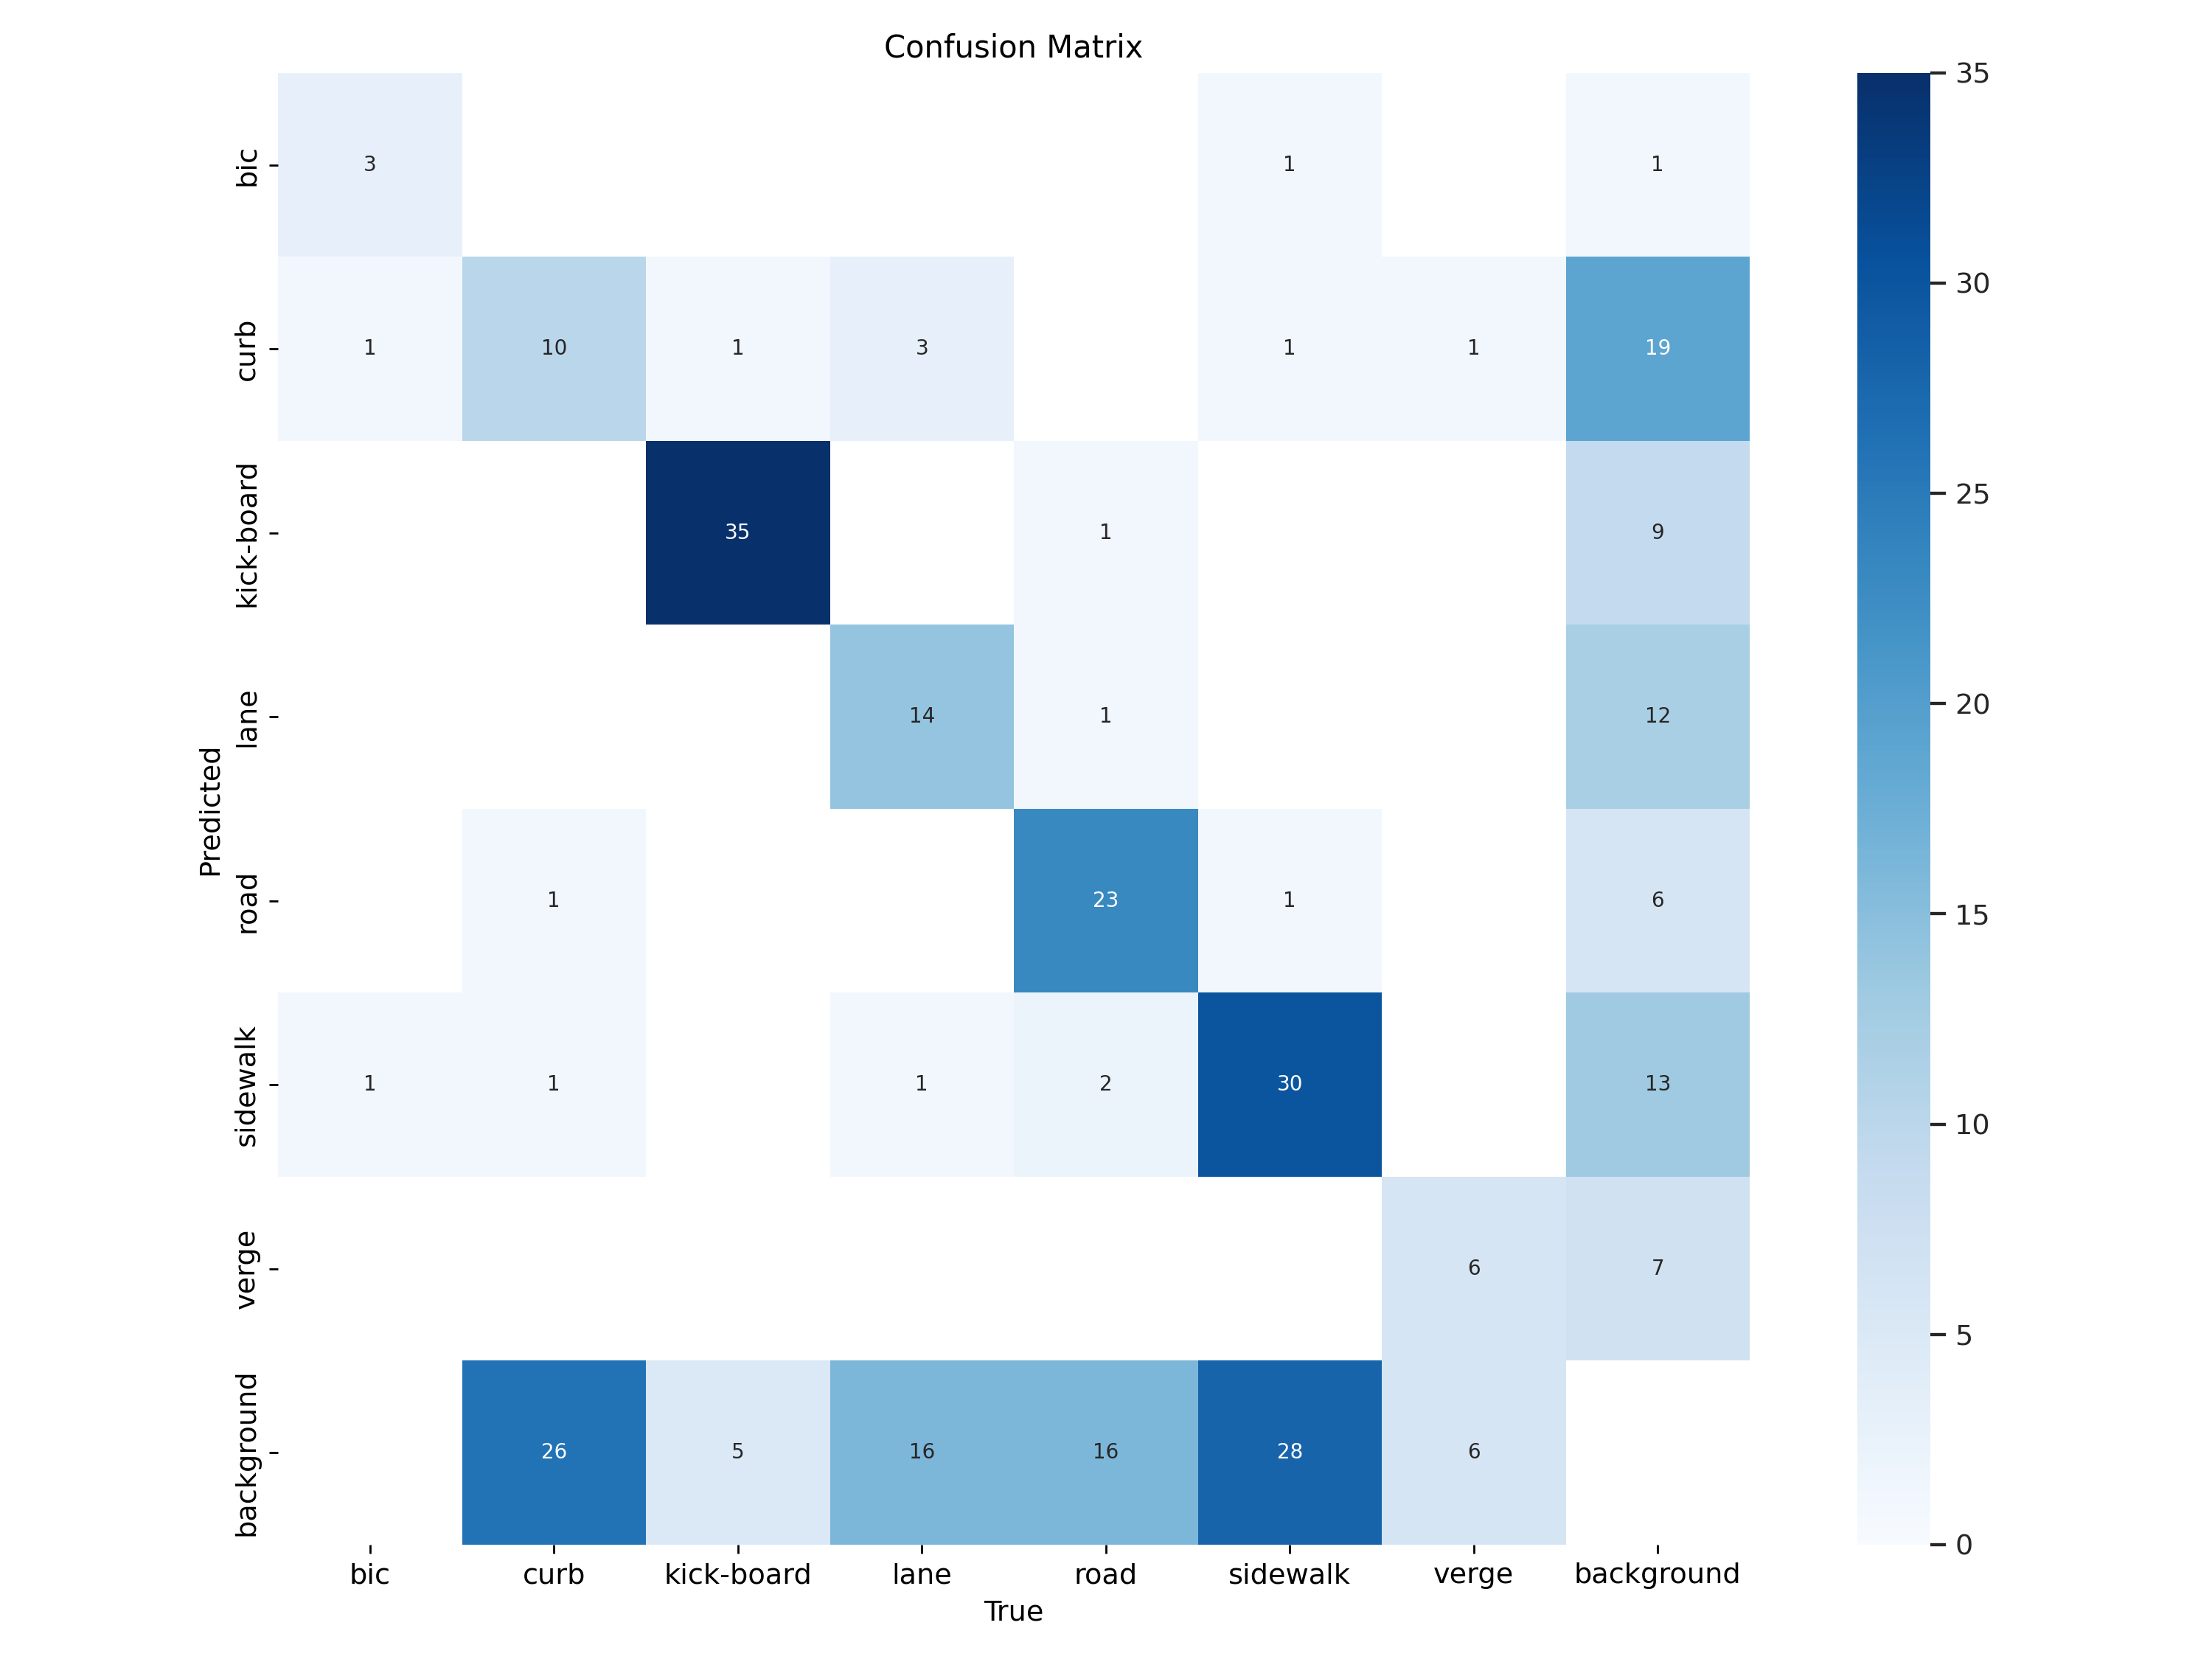

In [ ]:
Image(filename=f'/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/confusion_matrix.png', width=600)

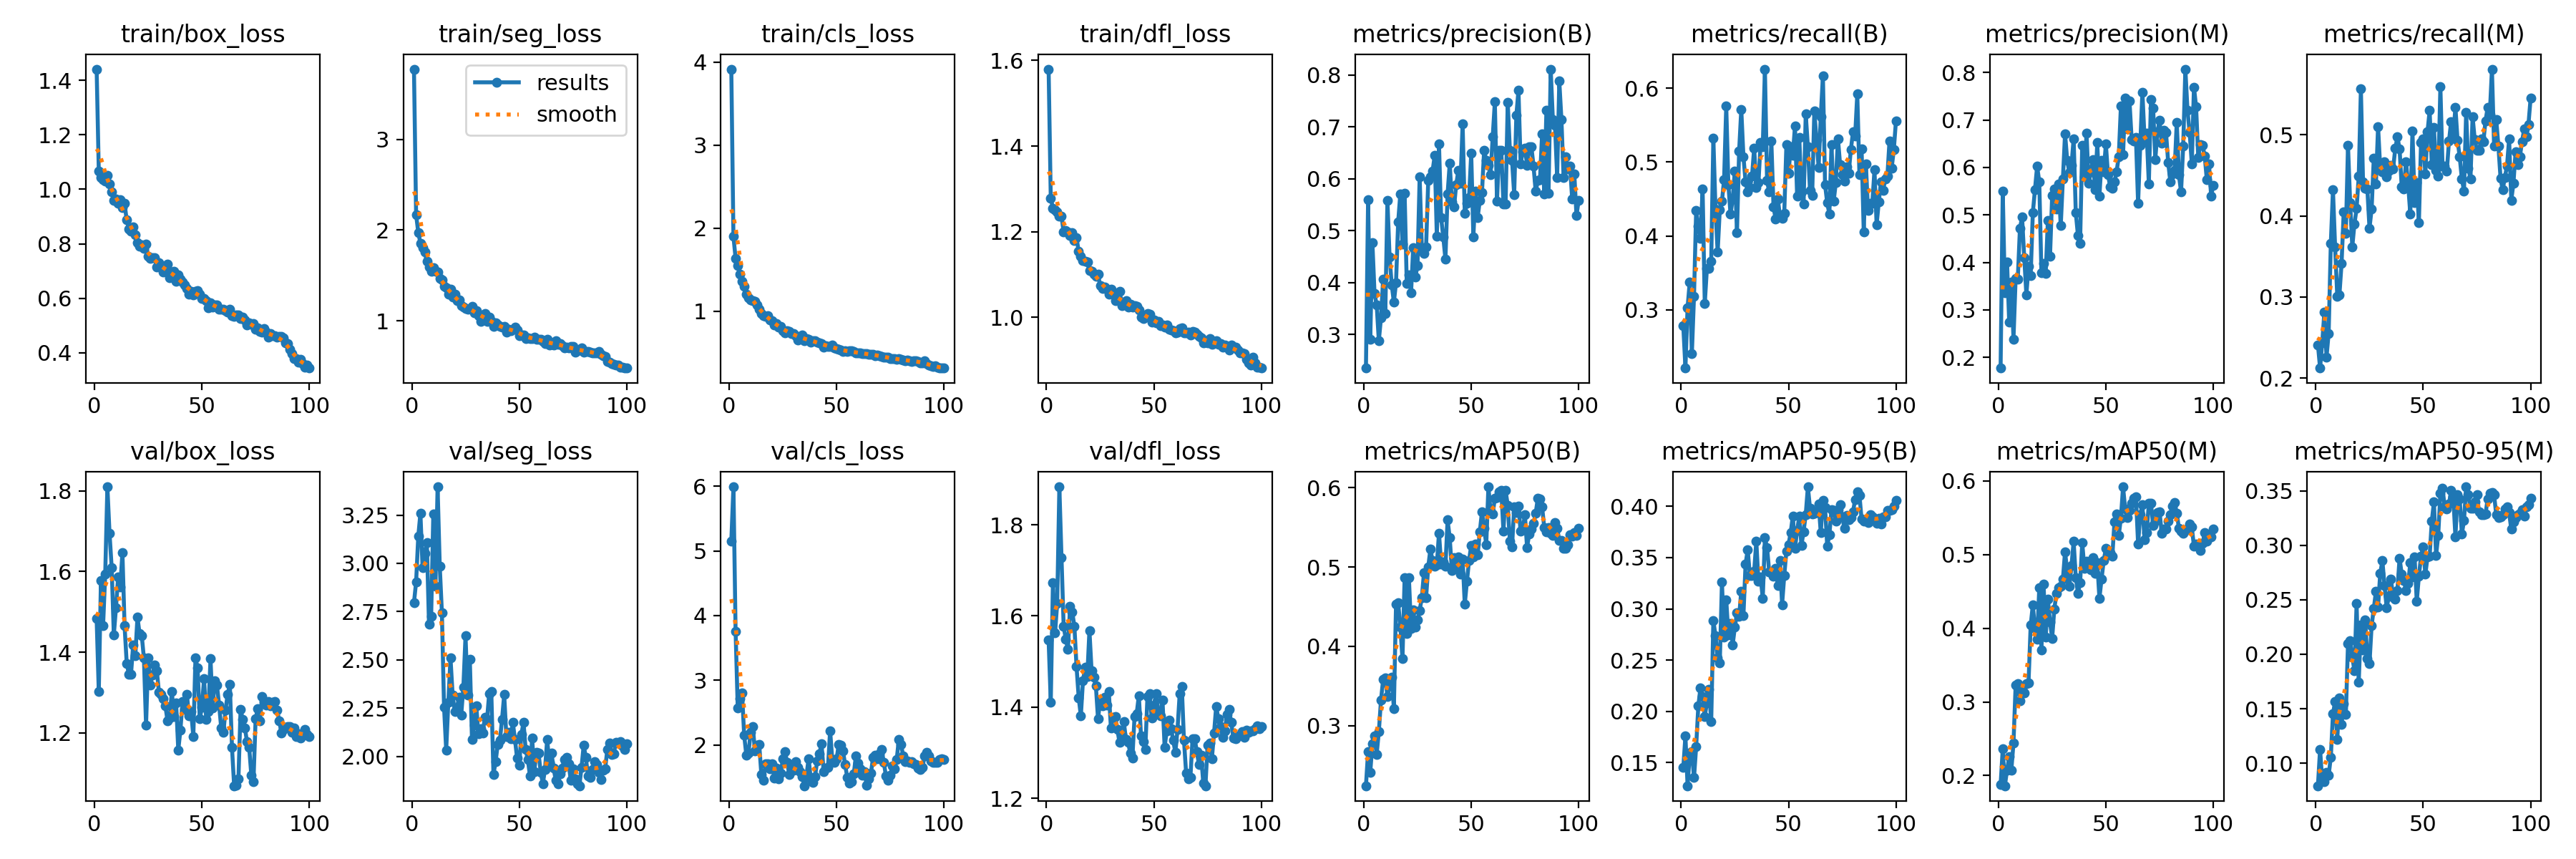

In [ ]:

Image(filename=f'/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/results.png', width=600)

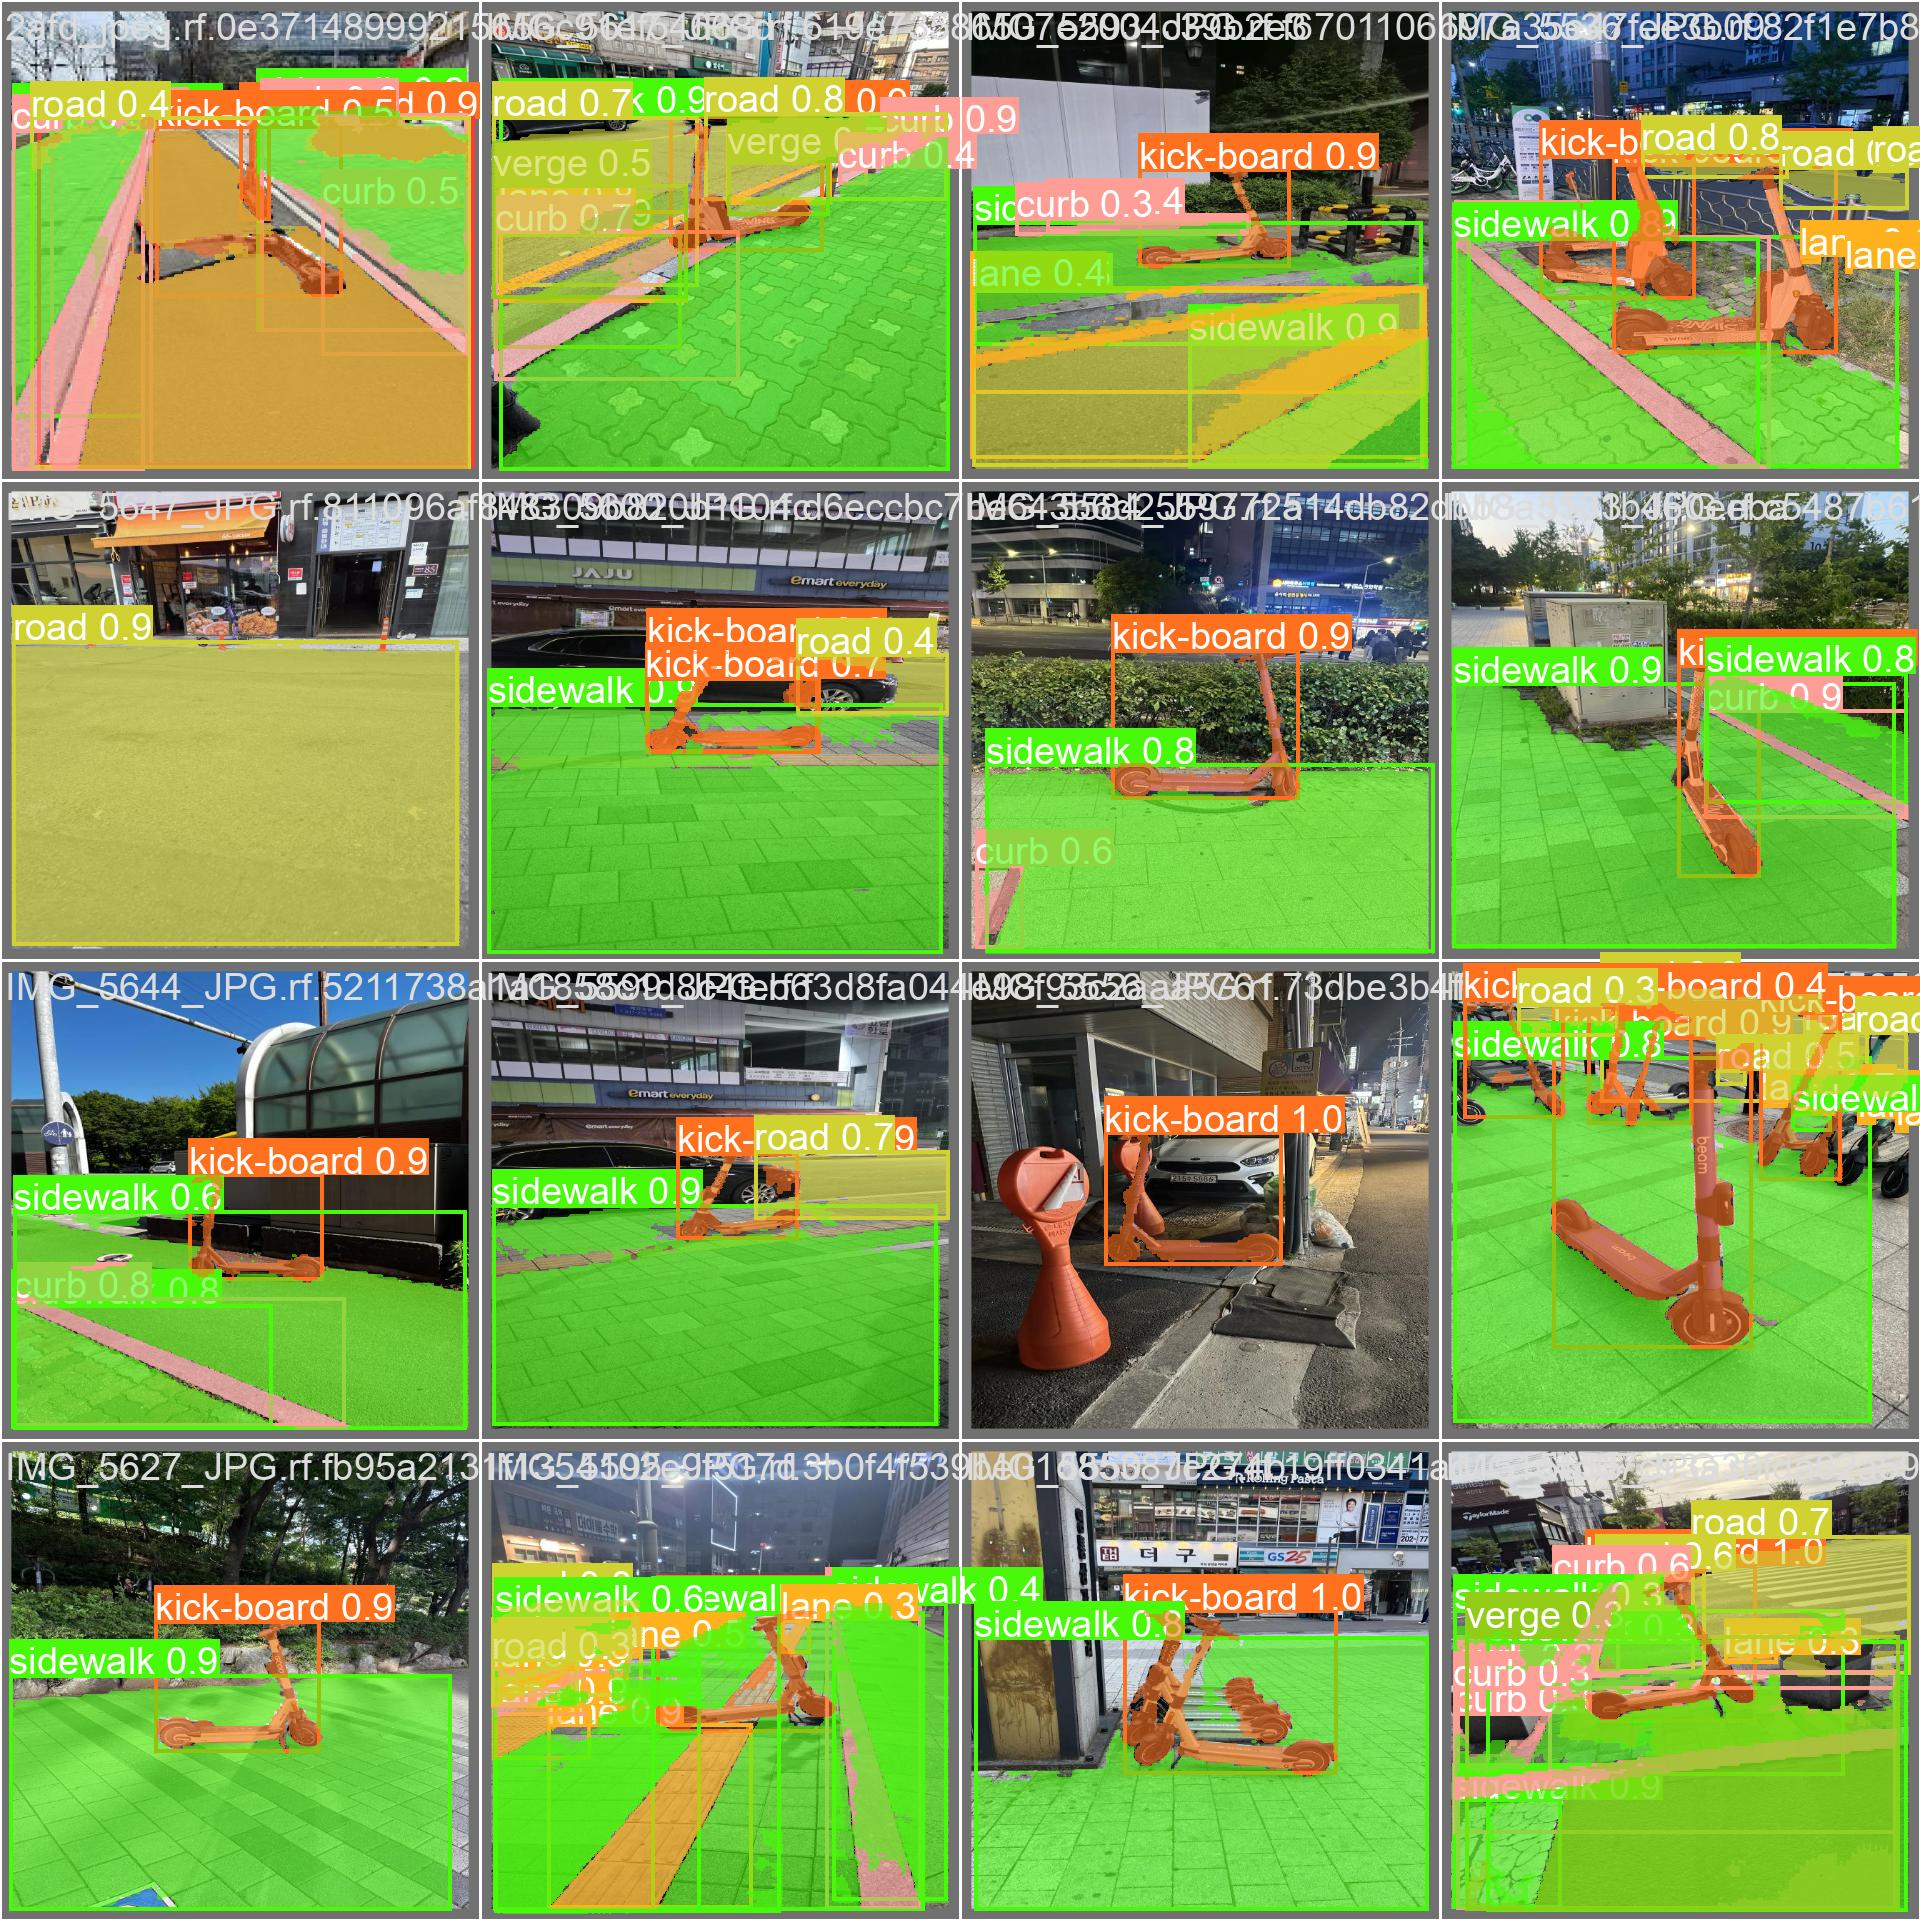

In [ ]:

Image(filename=f'/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
#!cd /content/drive/MyDrive/yolov8_1/runs/segment/val

!yolo task=segment mode=val model=/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/weights/best.pt data=/content/drive/MyDrive/yolov8_5/pm-1/data.yaml save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8_5/pm-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.26s/it]
                   all         33        235      0.606      0.521       0.57      0.417      0.748      0.461      0.561      0.352
                   bic         33          5       0.52        0.6      0.596      0.497      0.587        0.6      0.596      0.468
                  curb         33         38      0.326      0.289      0.286      0.226      0.595      0.263      0.298      0.173
            kick-board         33         41      0.754      0.854      0.883      0.743      0.858      0.805       0.8

In [ ]:
!cd /content/drive/MyDrive/yolov8_5/pm-1

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolov8_5/pm-1/test/images save_conf=True save_txt=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/34 /content/drive/MyDrive/yolov8_5/pm-1/test/images/22gr_jpeg.rf.3aaba4076a146c1dba44240461bb789b.jpg: 640x640 2 curbs, 1 kick-board, 2 lanes, 1 sidewalk, 1 verge, 21.0ms
image 2/34 /content/drive/MyDrive/yolov8_5/pm-1/test/images/2hthr_jpeg.rf.927ac48048ad6ca3511695d8f66212bb.jpg: 640x640 1 curb, 1 sidewalk, 21.2ms
image 3/34 /content/drive/MyDrive/yolov8_5/pm-1/test/images/2hyr_jpeg.rf.2ce5a6e9702a0f618634cebaa8e6cd7f.jpg: 640x640 1 bic, 4 curbs, 2 kick-boards, 1 road, 3 sidewalks, 1 verge, 21.0ms
image 4/34 /content/drive/MyDrive/yolov8_5/pm-1/test/images/2jytg_jpeg.rf.bd6debbeb80ea649660b47913ae3e416.jpg: 640x640 2 bics, 1 curb, 1 kick-board, 3 sidewalks, 2 verges, 20.9ms
image 5/34 /content/drive/MyDrive/yolov8_5/pm-1/test/images/2qw_jpeg.rf.e07860865bf64fa23

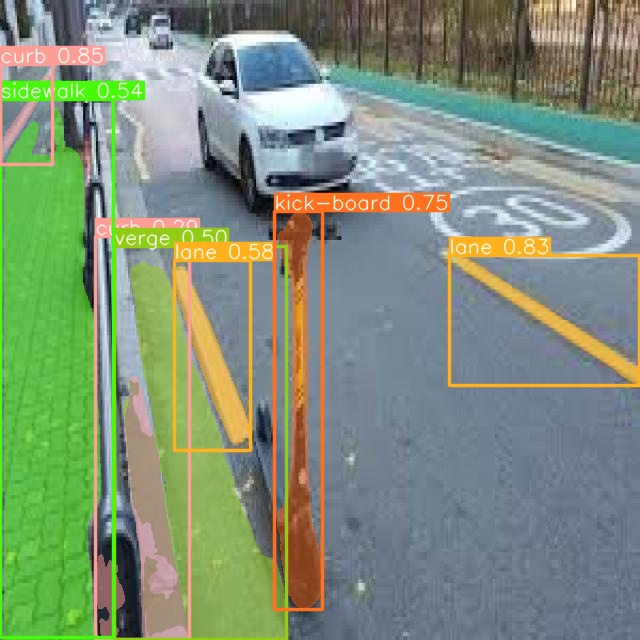

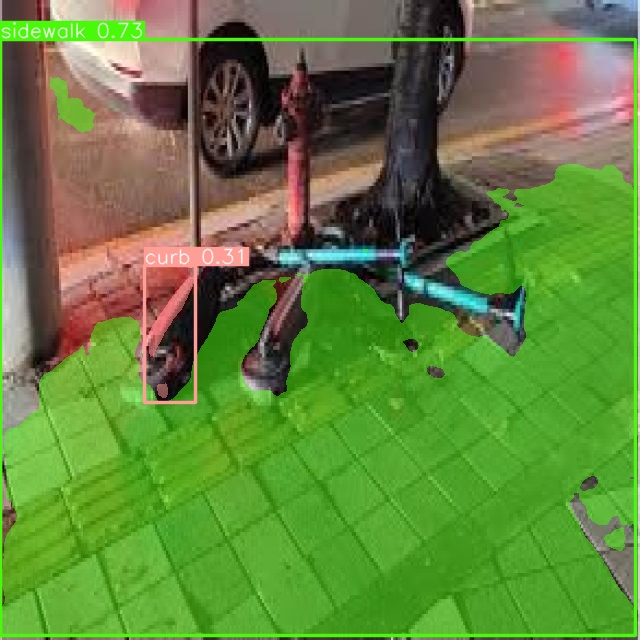

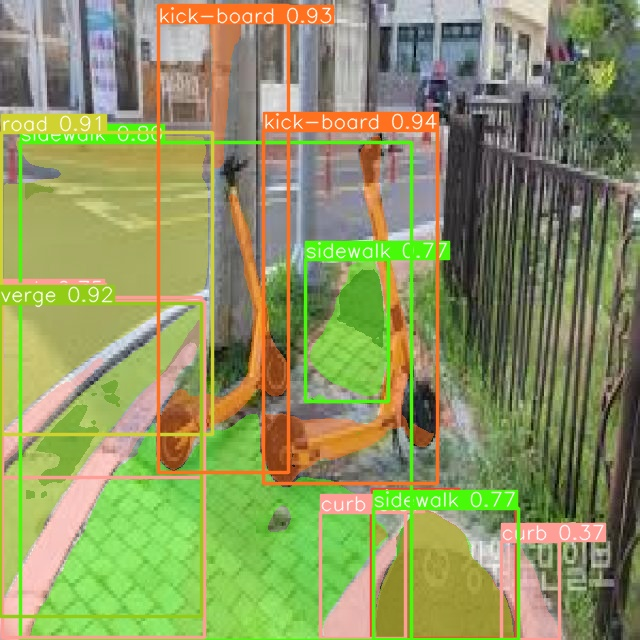

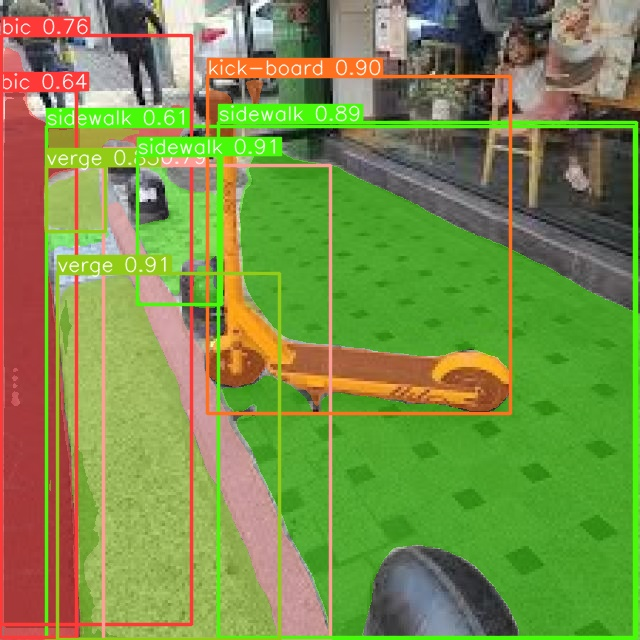

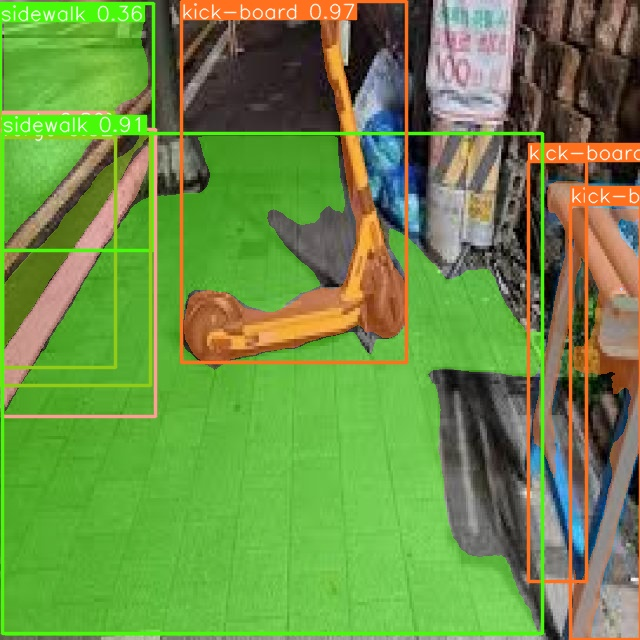

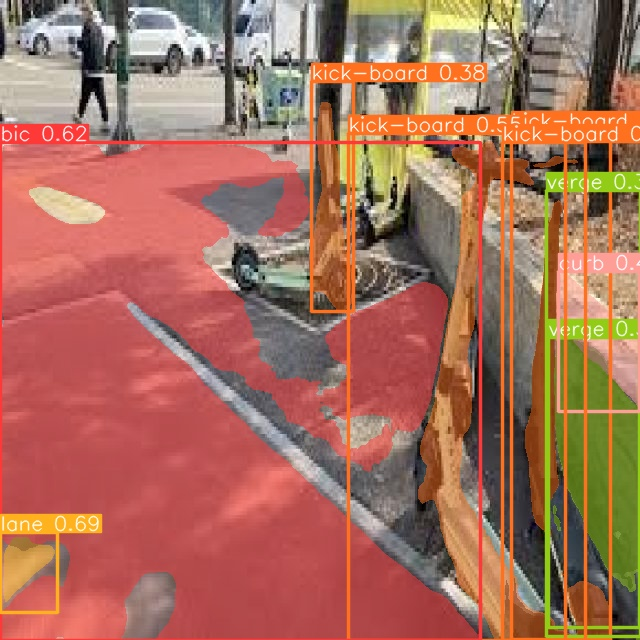

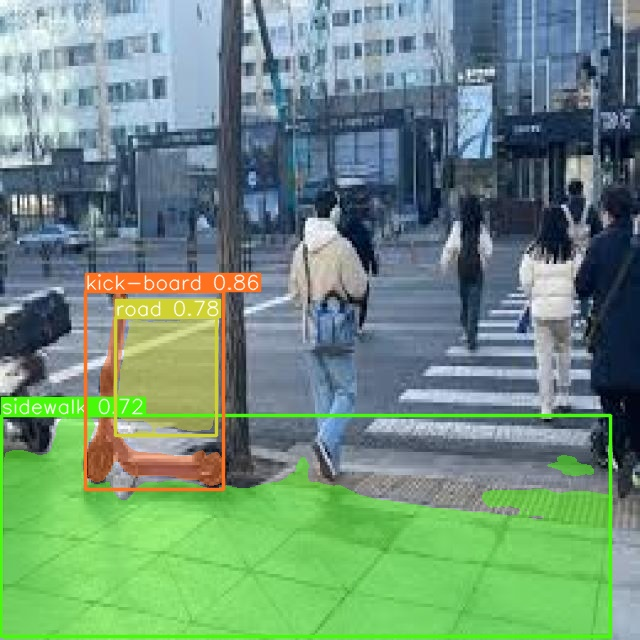

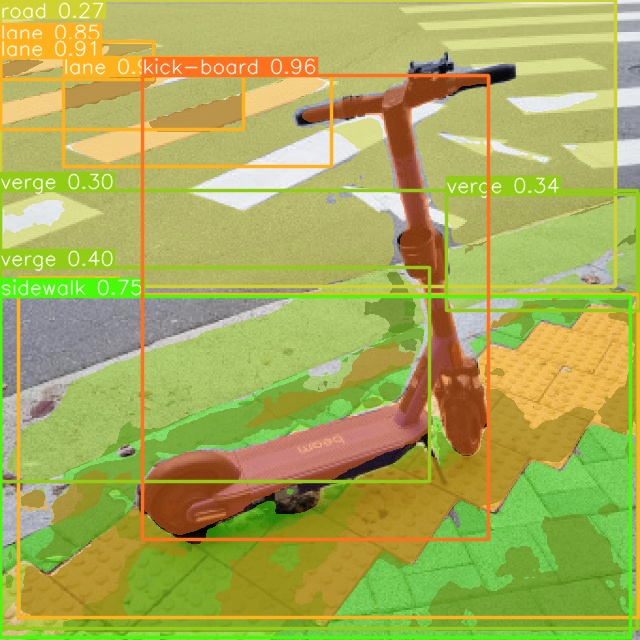

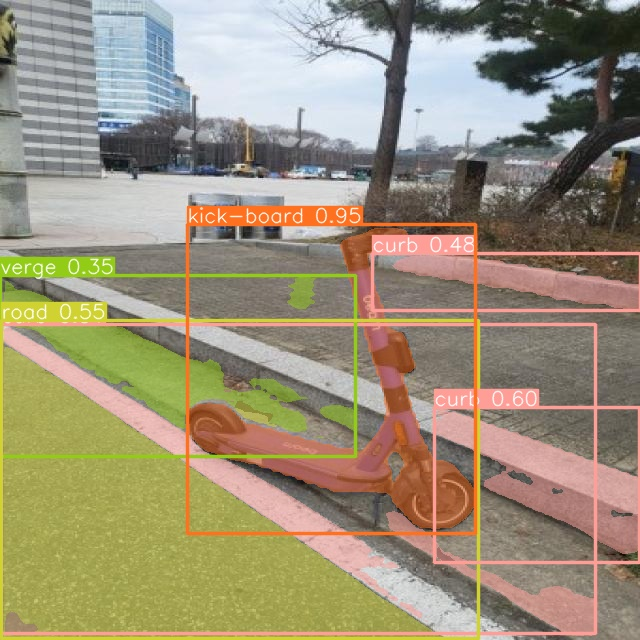

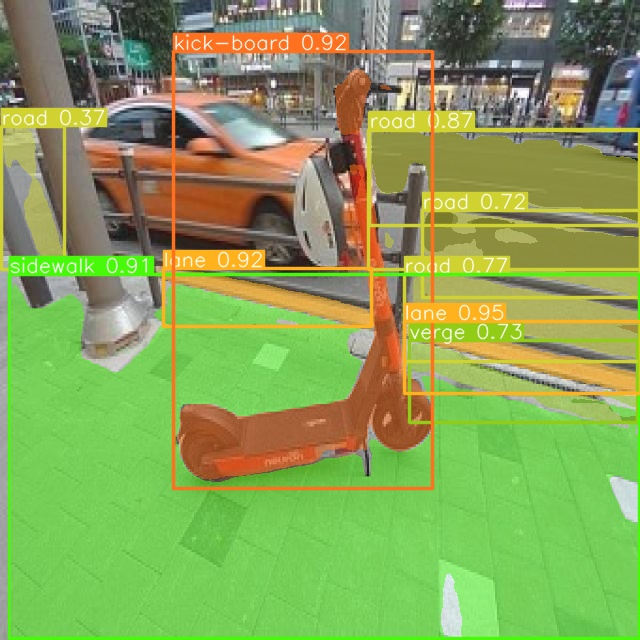

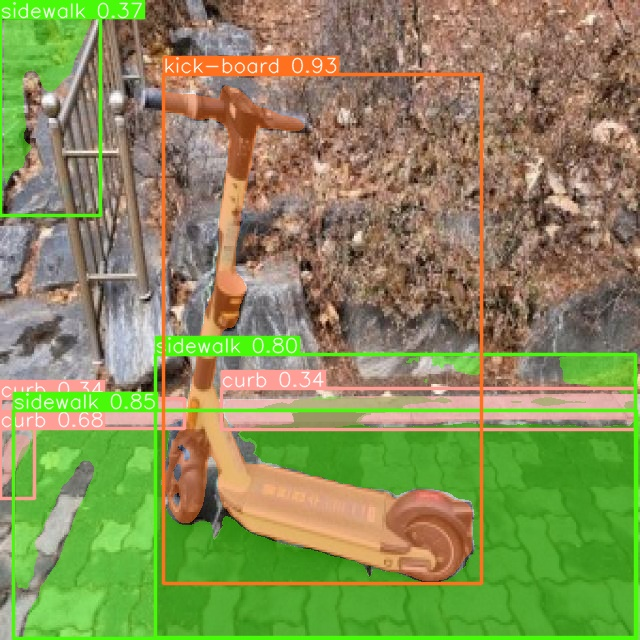

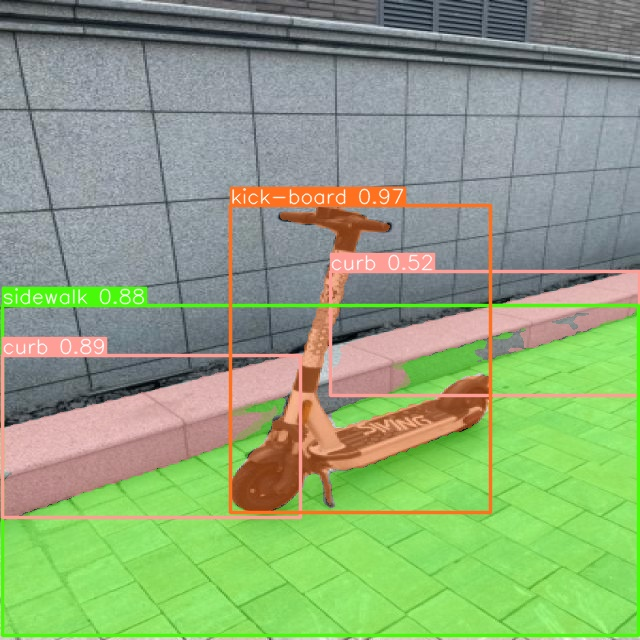

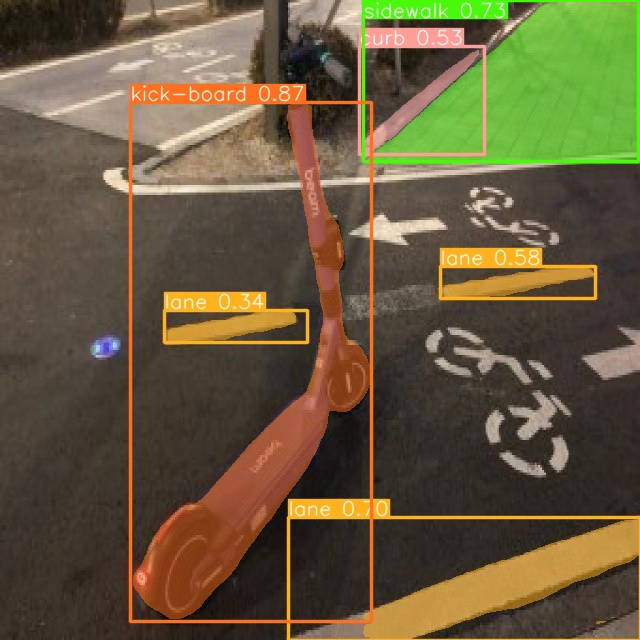

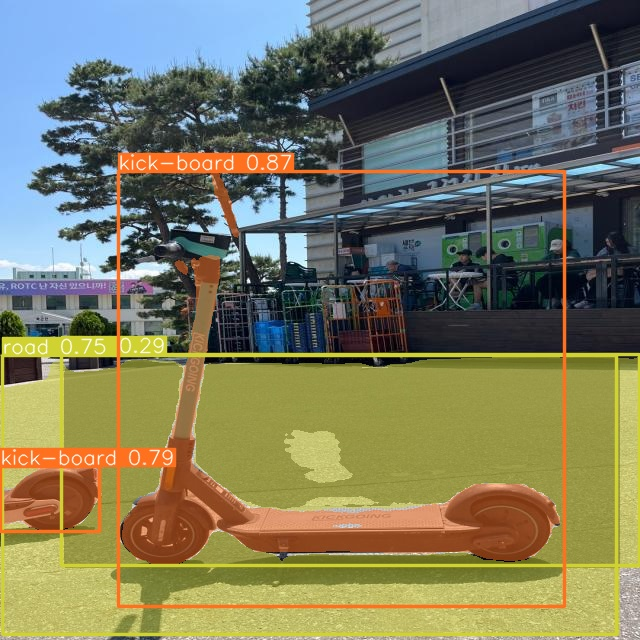

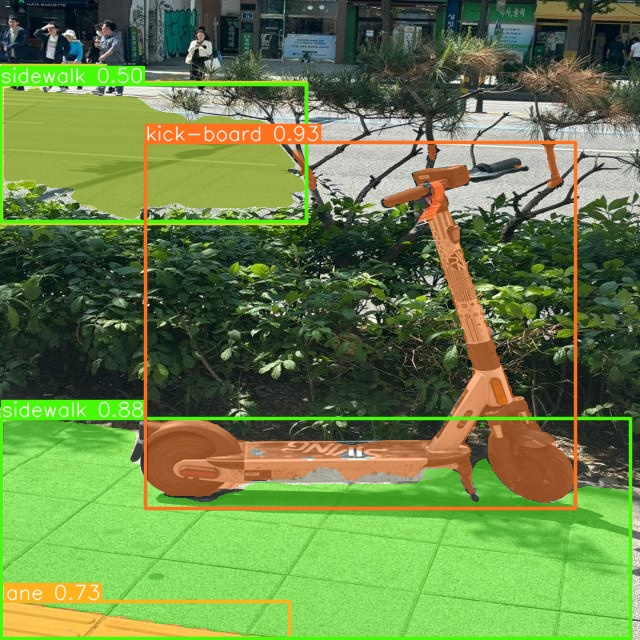

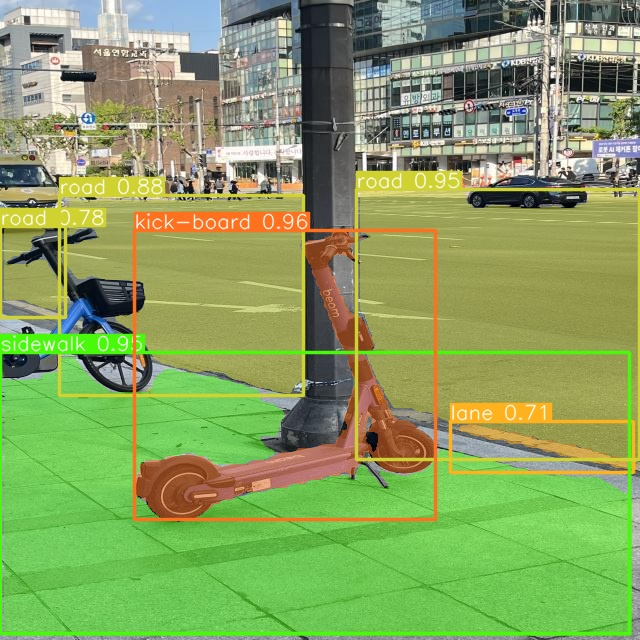

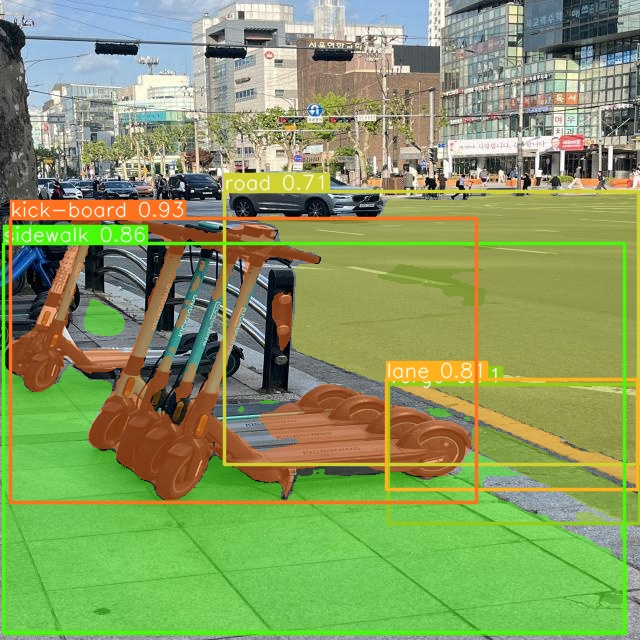

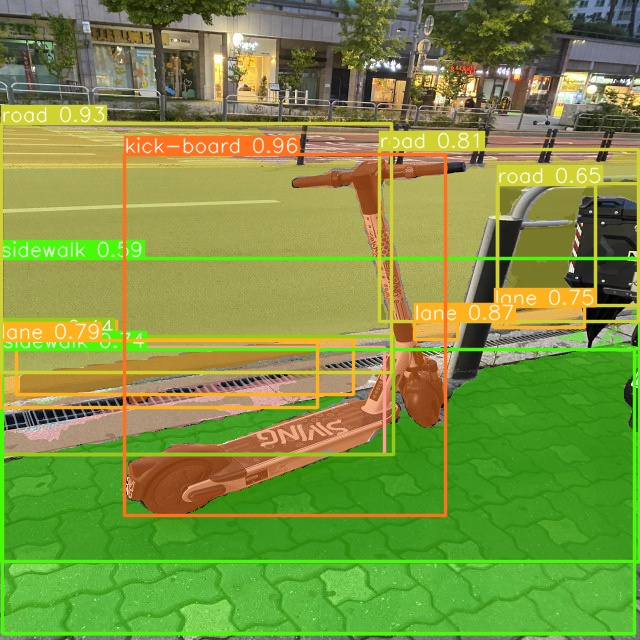

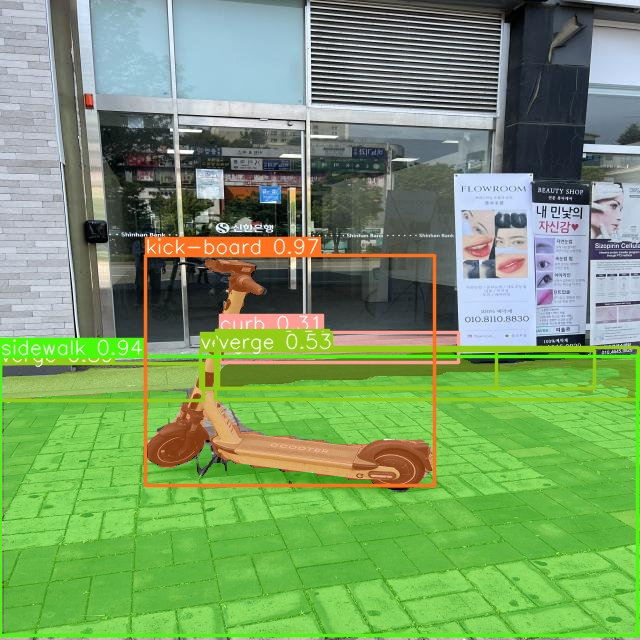

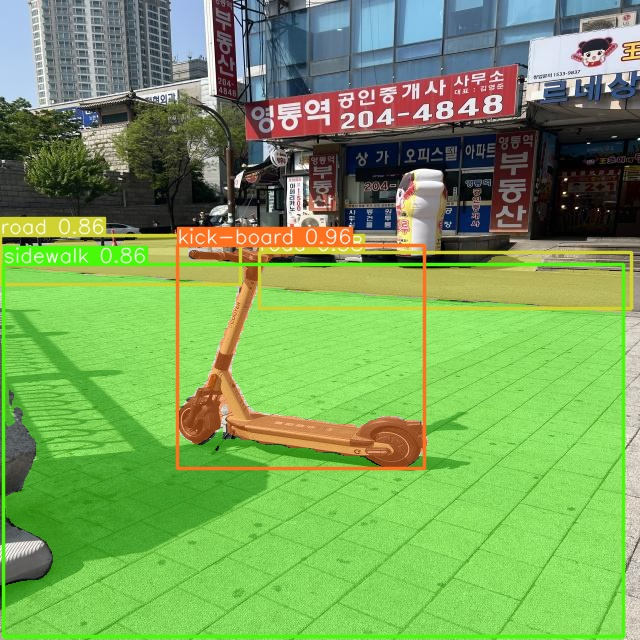

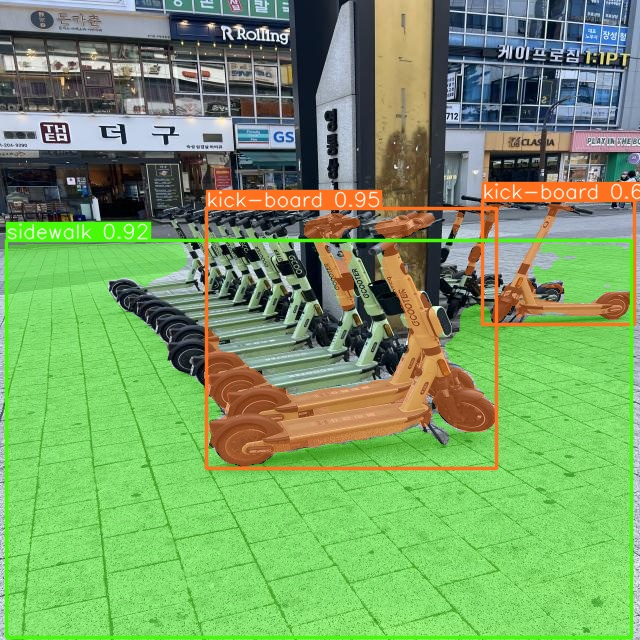

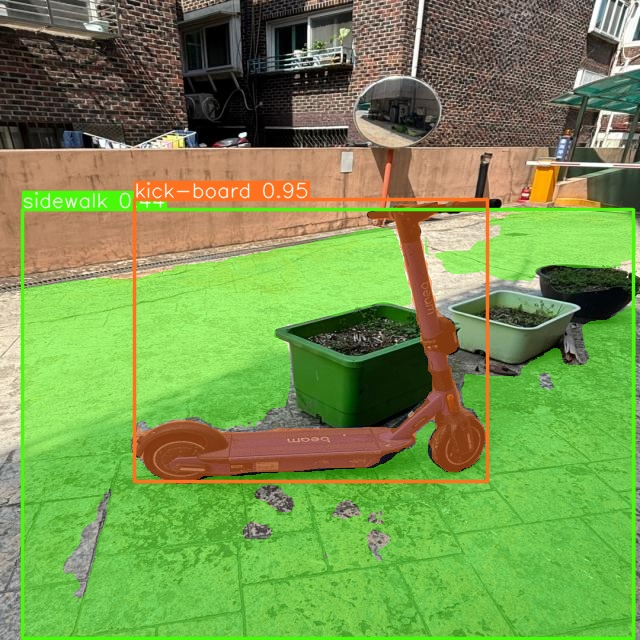

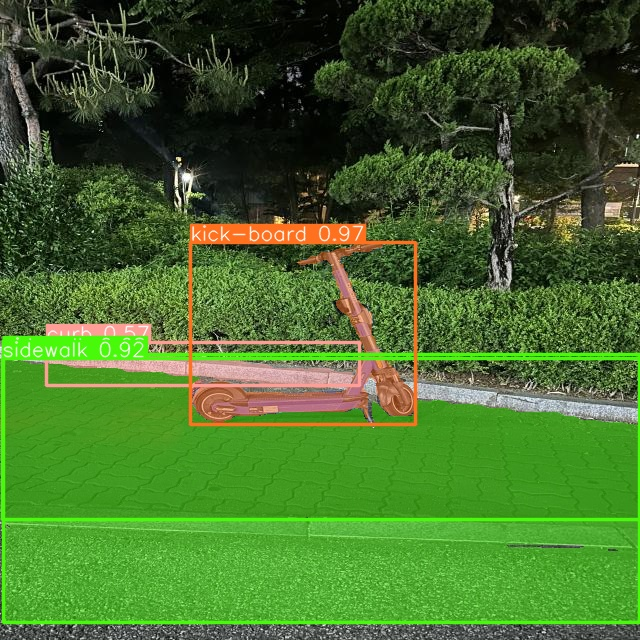

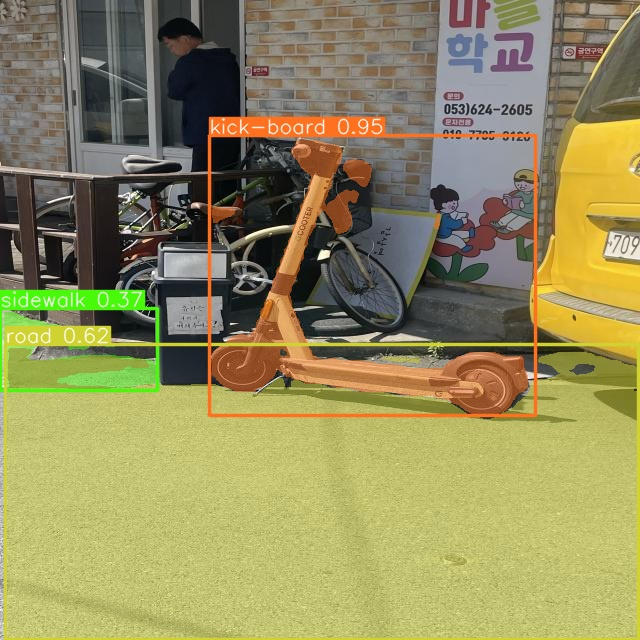

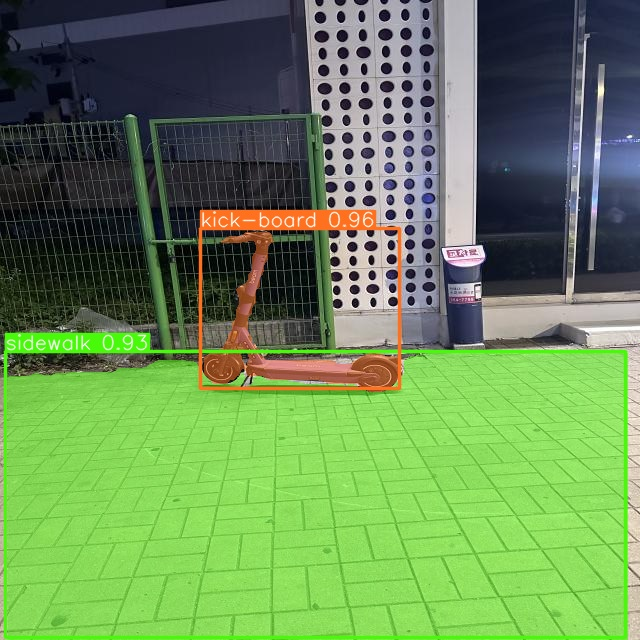

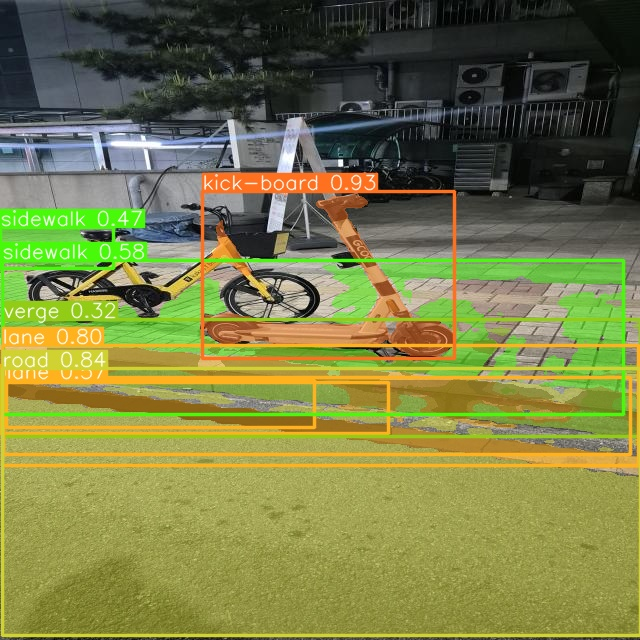

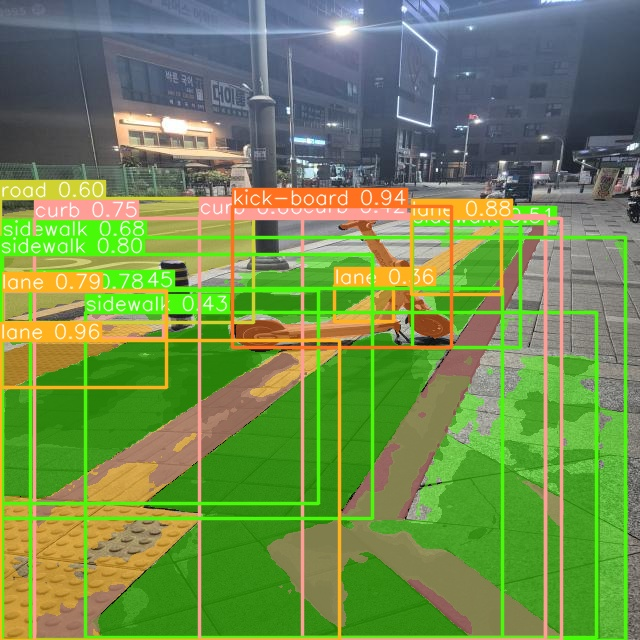

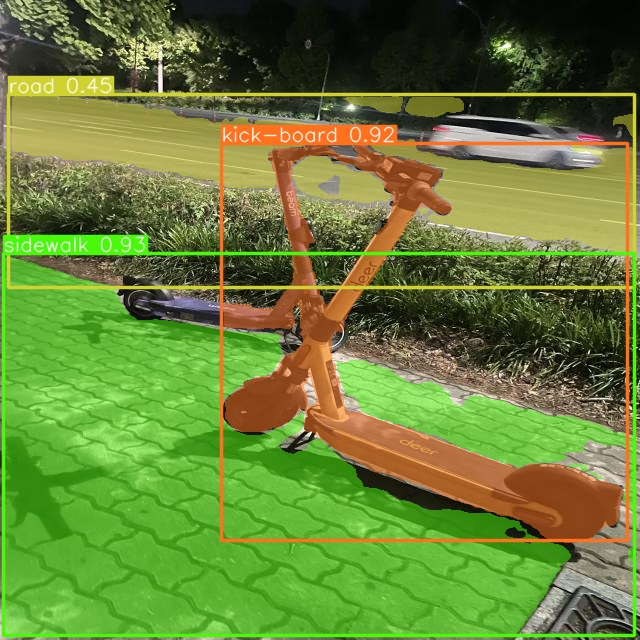

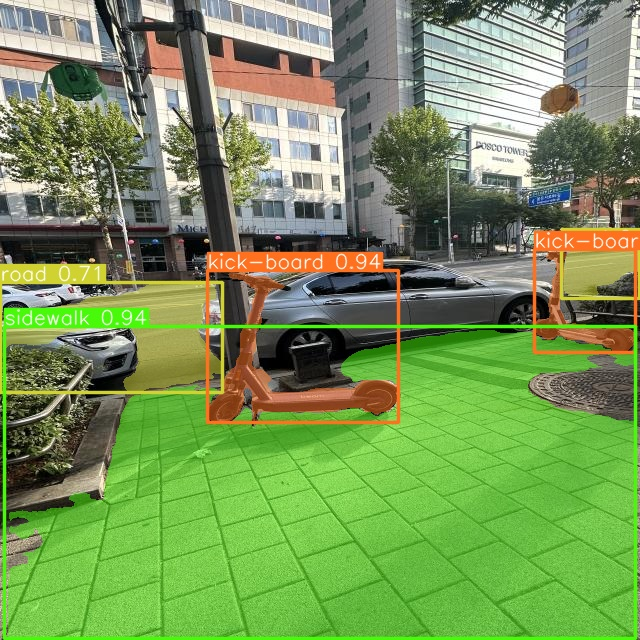

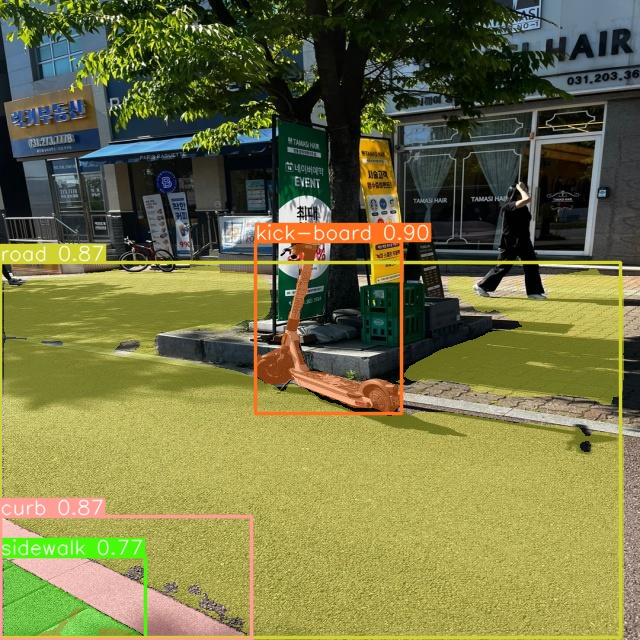

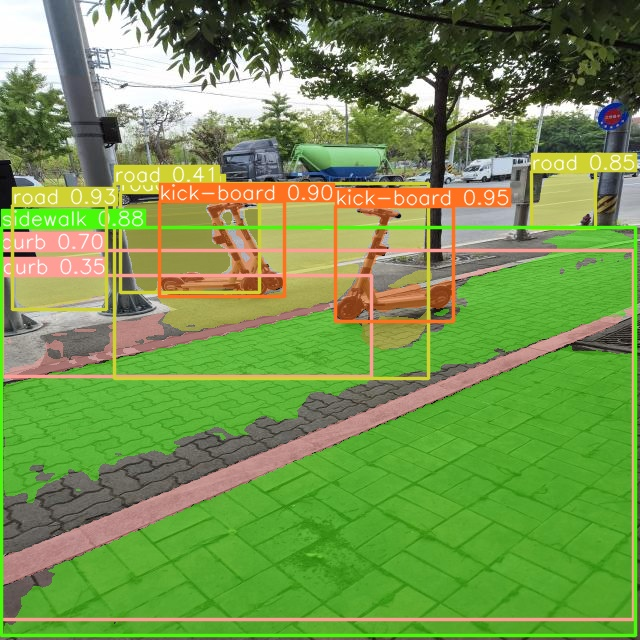

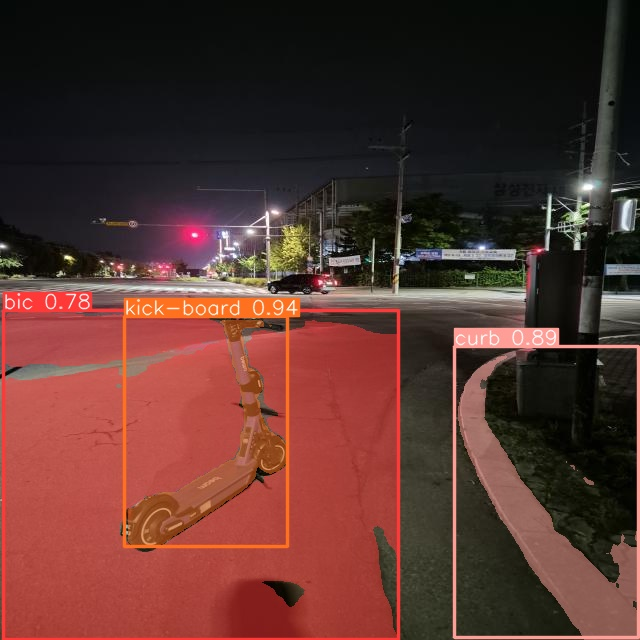

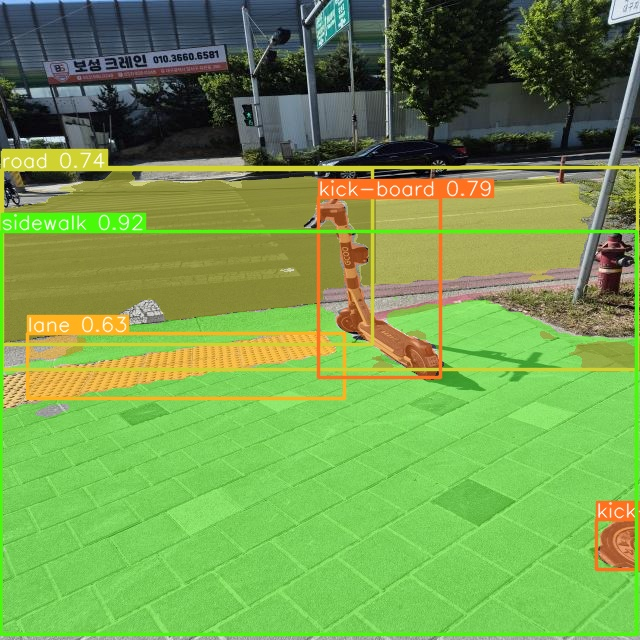

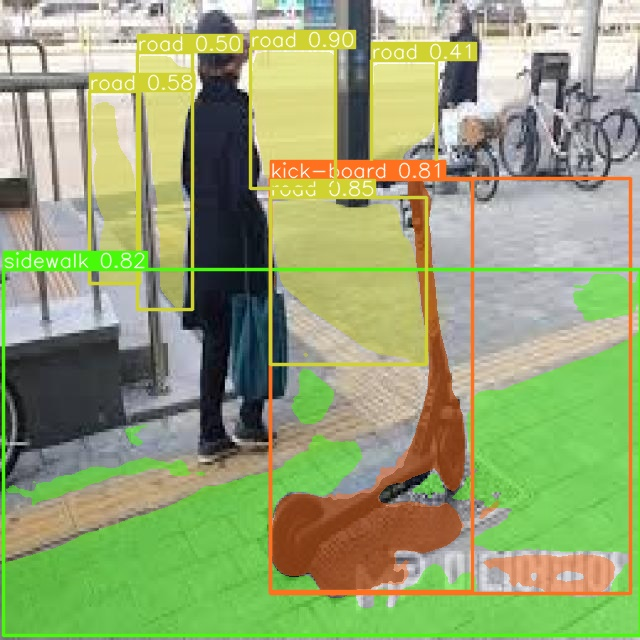

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov8_5/pm-1/runs/segment/predict/*.jpg')[:]:
      display(Image(filename=image_path, height=600))
      print("\n")